![Logo_unad](https://upload.wikimedia.org/wikipedia/commons/5/5f/Logo_unad.png)

<font size=3 color="midnightblue" face="arial">
<h1 align="center">Escuela de Ciencias Básicas, Tecnología e Ingeniería</h1>
</font>

<font size=3 color="navy" face="arial">
<h1 align="center">ECBTI</h1>
</font>

<font size=2 color="darkorange" face="arial">
<h1 align="center">Curso: Métodos Numéricos</h1>
</font>

<font size=2 color="midnightblue" face="arial">
<h1 align="center">Unidad 2: Ecuaciones No Lineales</h1>
</font>

<font size=1 color="darkorange" face="arial">
<h1 align="center">Febrero 28 de 2020</h1>
</font>



***

> **Tutor:** Carlos Alberto Álvarez Henao, I.C. D.Sc.

> **skype:** carlos.alberto.alvarez.henao

> **Herramienta:** [Jupyter](http://jupyter.org/)

> **Kernel:** Python 3.7


***

## Objetivos:

- Definir  métodos numéricos para la solución de ecuaciones de una variable utilizando argumentos matemáticos y computacionales.


- Determinar las raíces de una Ecuación No Lineal dada, empleando los métodos numéricos de manera eficiente y analizando los problemas de convergencia que puedan presentarse.


## Definición

Dada una ecuación no lineal, $f$, buscamos el valor de $x$ tal que: 

$$f(x) = 0$$

con $f:[a,b]\rightarrow \Re$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

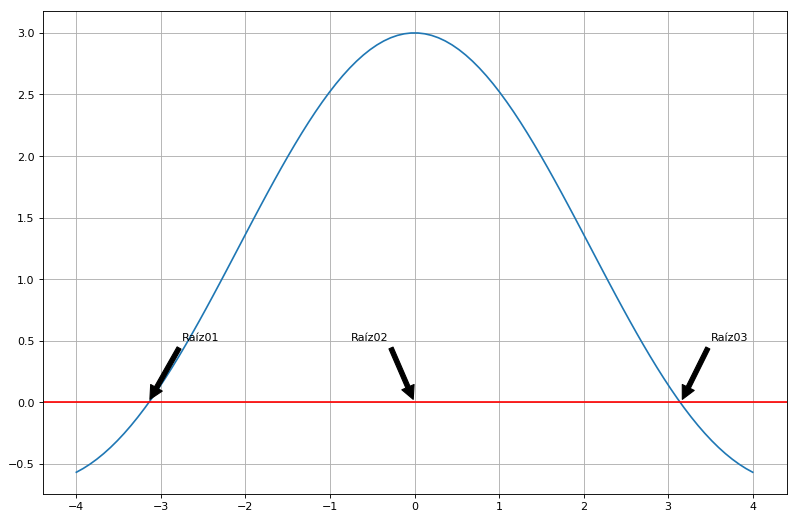

In [2]:
#import pylab
import matplotlib.pyplot as plt
import numpy

x = numpy.linspace(-4,4,100) # 100 linearly spaced numbers
y = numpy.sin(x)/x # computing the values of sin(x)/x
#y = numpy.sin(x) # computing the values of sin(x)
fig = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)

# compose plot
plt.plot(x,3*y) # 2*sin(x)/x and 3*sin(x)/x
ax.annotate('Raíz01', xy=(-3.15, 0), xytext=(-2.75, 0.5),arrowprops=dict(facecolor='black', shrink=0.05),)
ax.annotate('Raíz02', xy=(0, 0), xytext=(-0.75, 0.5),arrowprops=dict(facecolor='black', shrink=0.05),)
ax.annotate('Raíz03', xy=(3.15, 0), xytext=(3.5, 0.5),arrowprops=dict(facecolor='black', shrink=0.05),)

plt.axhline(0, color='red')           # se resalta el eje x para ayudar en la interpretación visual
plt.grid(True)
plt.show() # show the plot

Para hallar las raíces de una ecuación no lineal se requiere conocer:

- Número de raíces de la ecuación


- Información preliminar:  dominio, rango, continuidad, derivadas, intervalos de  crecimiento, tipos de raíces...


- Seleccionar un algoritmo conociendo sus limitaciones y dándole una aproximación inicial.


### Solución de Ecuaciones No Lineales

- Un sistema de ecuaciones lineales tiene solución única si la matriz de coeficientes es no singular.


- La existencia y unicidad de soluciones de ecuaciones no-lineales es mucho más complicado, difícil de determinar y con una mayor variedad de comportamientos.


- Para un sistema de ecuaciones lineales existen tres posibilidades: única, infinitas o  ninguna solución.


- Una ecuación no-lineal puede tener cualquier número de posibles soluciones.


- Una ecuación no-lineal puede tener múltiples raíces, donde tanto la función como su derivada son iguales a cero. $f(x)=0$ y $f’(x)=0$.	


- En $1D$, esta propiedad significa que la curva tiene una tangente horizontal en el eje $x$.


- Si $f(x) = 0$ y $f’(x) \neq 0$ , entonces se dice que se tiene una raíz simple.


- El mismo concepto de condicionamiento visto en el capítulo anterior puede aplicarse.

### Tazas de convergencia y métodos iterativos

- Muchas ecuaciones no-lineales no pueden resolverse aún con un número muy grande de iteraciones.


- El costo total de resolver un problema no-lineal depende del costo por iteración y del número de iteraciones requeridas para la convergencia.


- Para comparar la efectividad de los métodos iterativos se necesita caracterizar su taza de convergencia.


- error en la iteración $k$:

$$e_k = x_k – x$$

$x_k$: es la solución aproximada en la iteración $k$ y $x$ es la solución $"verdadera"$.


Un método se dice que converge con taza de convergencia $r$ si:

$$\lim_{k \rightarrow \infty } \frac{\|e_{k+1}\|}{\|e_k\|^r}=C$$

- Para alguna constante $C \neq 0$

  - si $r = 1$ y $C < 1$, la tasa de convergencia es lineal;
    
  - si $r > 1$, la tasa de convergencia es superlineal;
    
  - si $r = 2$, la tasa de convergencia es cuadrática.
 


### Criterios de Aproximación

Supongamos que la función $f$ es continua en alguna vecindad de $\alpha$ que contiene a la sucesión ${x_n}_n$, $n=0,1,2,...$, y que es tal que: 

$$\lim_{n \rightarrow \infty} x_n = \alpha$$

Entonces

$$\lim_{n \rightarrow \infty} f(x_n) = f(\alpha) = 0$$

y así, dado cualquier número positivo $\epsilon$, llamado **tolerancia**, existe $N \in N={0,1,2,\ldots}$ tal que para todo $n \geq N$ se tiene que $|f(x_n)|<\epsilon$


- Dado un número pequeño $\epsilon > 0$ llamado tolerancia se puede escoger como aproximación a la raíz $\alpha$ al término $x_N$ de la sucesión mencionada, donde $N$ es el menor entero no-negativo que satisface uno de los siguientes criterios:

$$|f(x)| < \epsilon$$

$$|x_n - x_{n-1}| < \epsilon$$

$$\frac{|x_n - x_{n-1}|}{x_n} < \epsilon$$

### Existencia de Raíces

El Objetivo de algunos de los métodos para determinar raices de una función no lineal es encontrar un intervalo que contenga al menos una raíz, y se basa en el **teorema del Valor Intermedio**:

- **Teorema del Valor Intermedio:** Sea $f$ una función continua en el intervalo $[a,b]$ y $k$ es cualquier número entre $f(a)$ y $f(b)$, entonces existe un número $c$ en el intervalo $(a,b)$ tal que $f(c)=k$

Otros teoremas del Cálculo que nos servirán para nuestro propósito en el capítulo son:


- **Existencia de Raíces:** Sea $f$ una función de variable y valor real definida en $[a,b]$. Si se cumple que:

  1. $f$ es continua en el intervalo $[a,b]$

  2. $f(a) \times f(b) < 0$

  entonces existe algún $x_m$ en $[a,b]$ que es la raíz de la ecuación $f(x)=0$.
  

- **Existencia de una única raíz:** Sea $f$ una función de variable y valor real definida en $[a,b]$. Si se cumple que:

  1. $f$ es continua en el intervalo $[a,b]$
  
  2. $f(a) \times f(b) < 0$
  
  3. $f$ es diferenciable en $(a,b)$ y $f'(x)$ no cambia de signo para todo $x \in [a,b]$
  
  entonces existe un único $x_m$ en $[a,b]$ que es raíz de la ecuación $f(x)=0$.

### Funciones con várias raíces:

Las funciones no lineales pueden tener ninguna, una o varias raíces en un intervalo dado, y es necesario localizar cada una de ellas.

- La posible existencia de raíces múltiples complica el problema.

  - En la vecindad de la raíz, tanto la función como su derivada se acercan a cero.
 
  - Las ecuaciones con un número par de raíces múltiples son tangentes al eje x y no lo cruzan.
  
  - Las ecuaciones con un número impar de raíces múltiples cruzan al eje x en un punto de inflexión.
  
  - En caso de raíces múltiples, al no haber cambio de signo, los métodos cerrados no son confiables.

## Método de las Búsquedas Incrementales:

La búsqueda consiste en empezar en un extremo del intervalo de interés y evaluar la función con pequeños incrementos a lo largo del intervalo.
- Si la longitud del incremento no es lo suficientemente pequeña, algunas raíces pueden pasar inadvertidas.

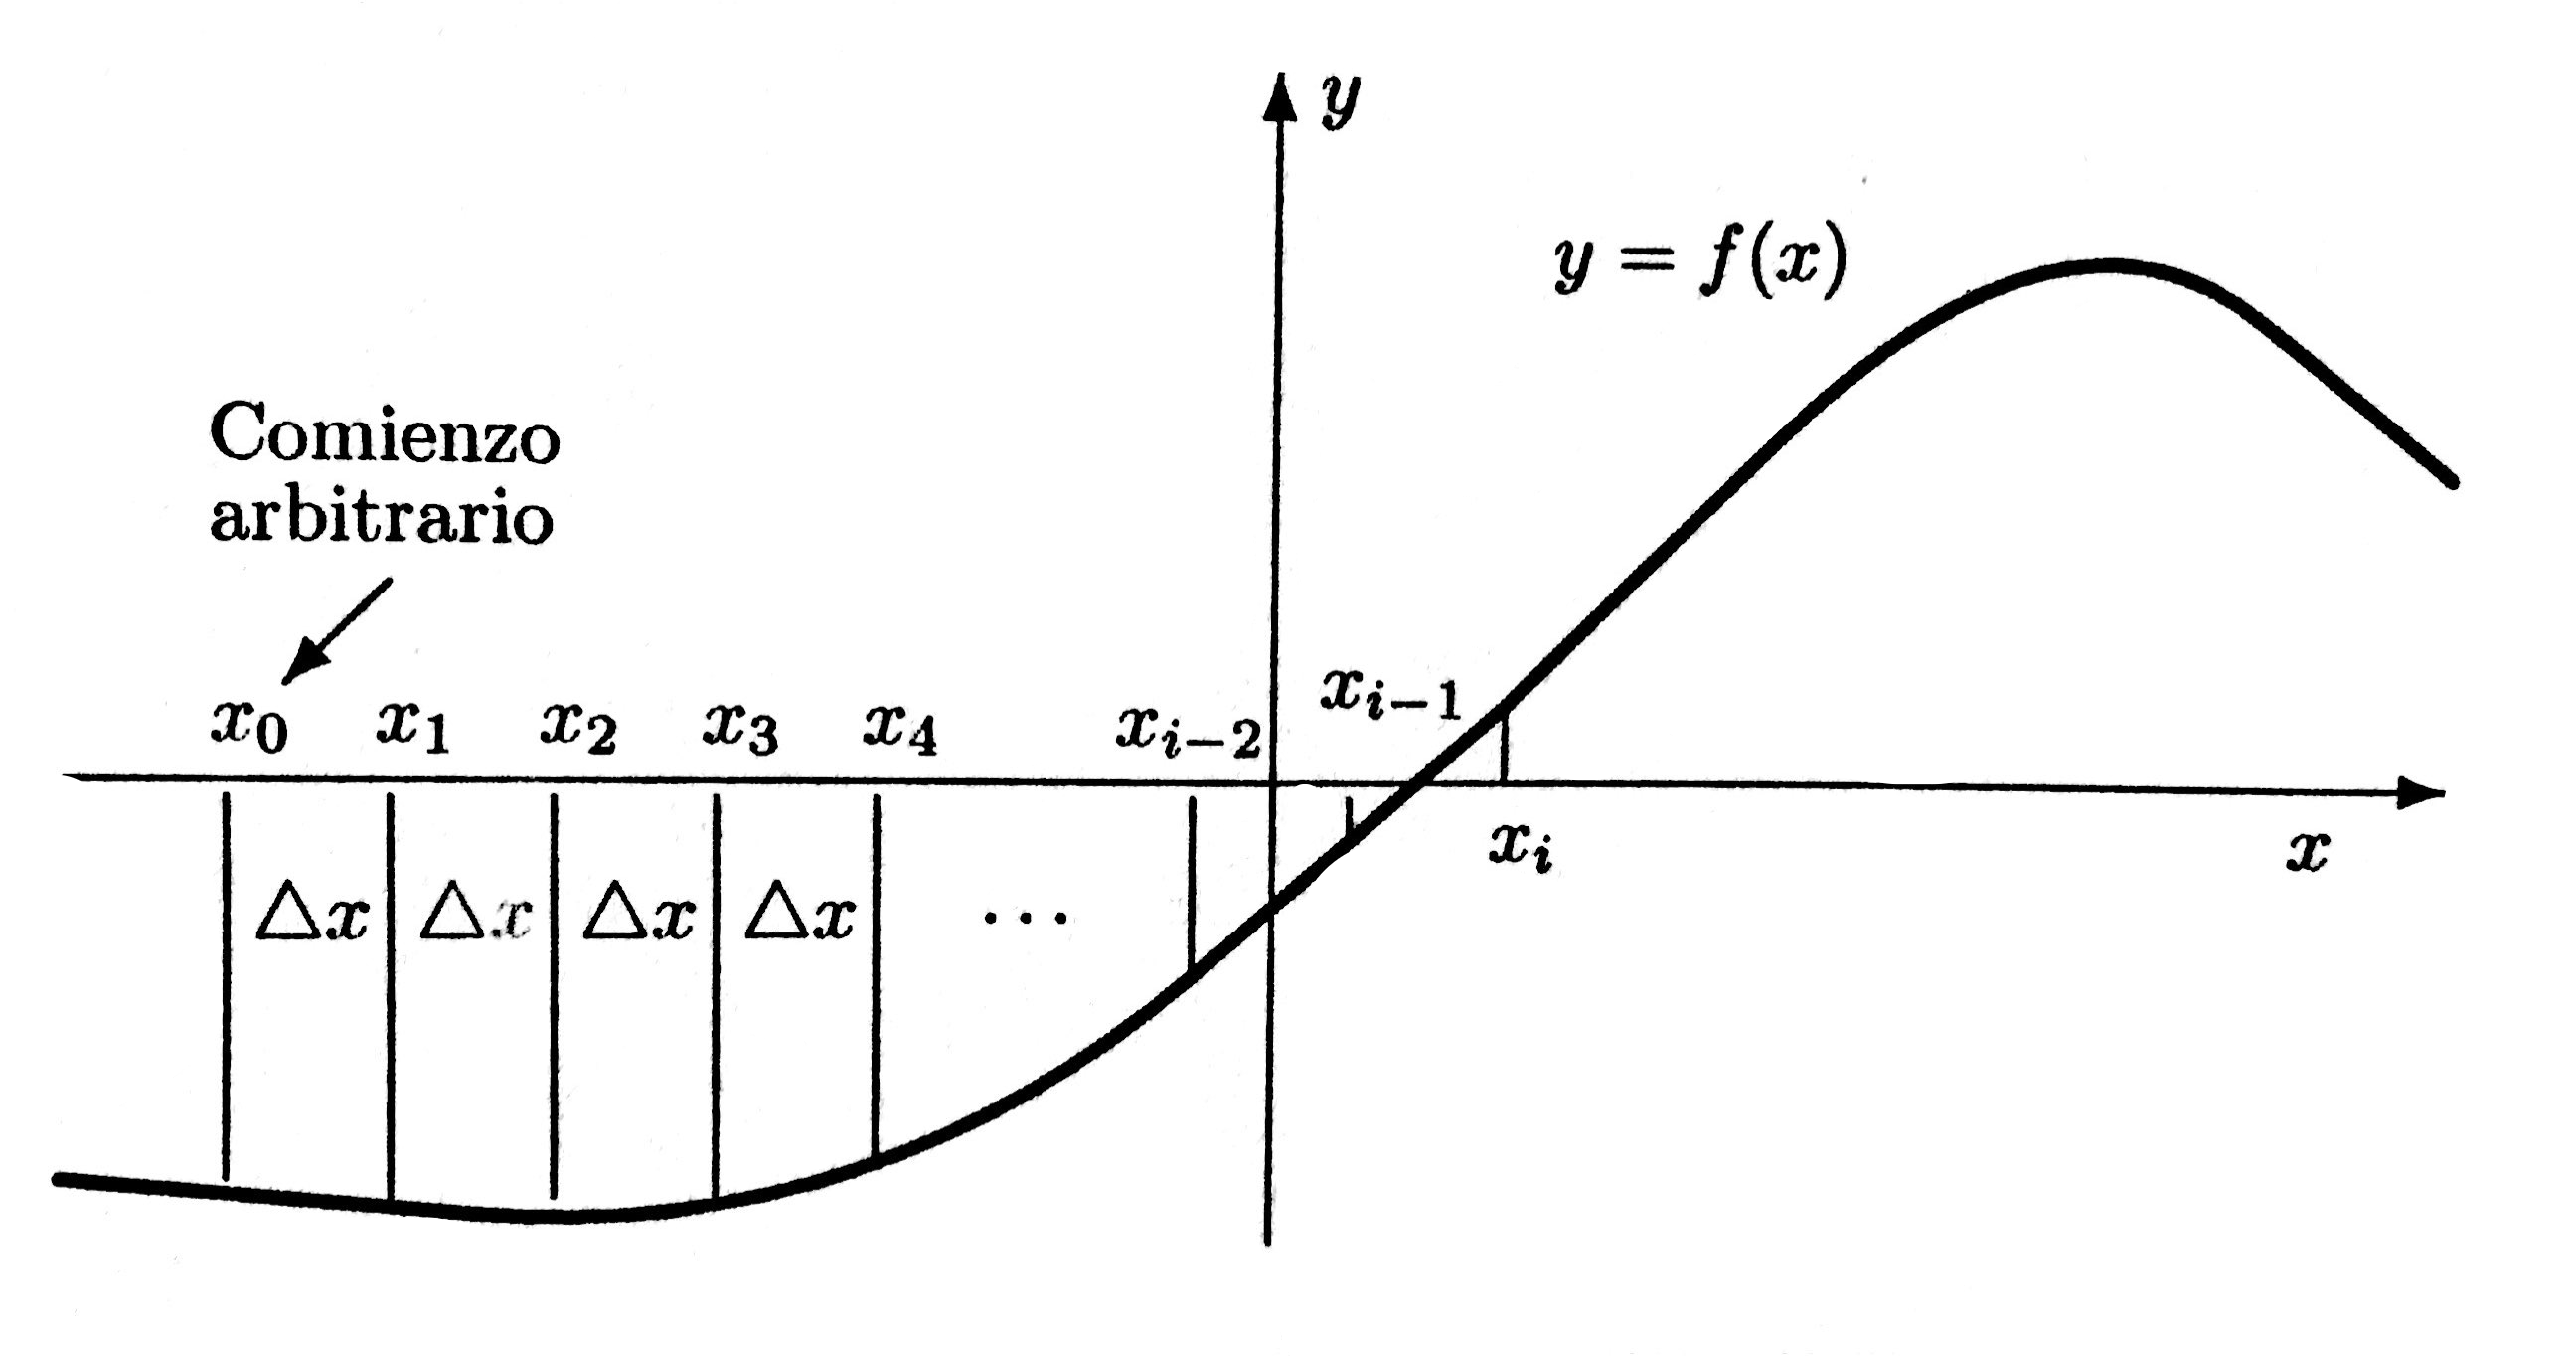

**Tomado de:** *Correa Zabala, Francisco*. Métodos Numéricos, Universidad EAFIT. 2013

Si se detecta que una función $f$ es continua en un intervalo $[a,b]$ y que en dicho intervalo se presenta un cambio de signo en los valores de $f(a)$ y $f(b)$, se concluye que existe al menos una raíz en ese intervalo (pueden ser varias). 

A continuación se propone una opción de cómo podría ser un método que sirva como apoyo inicial a los métodos numéricos para encontrar raíces de forma aproximada en un intervalo dado.

### Método de Búsquedas Incrementales

1. Verificar la continidad de $f$ en $[a,b]$ empleando argumentos teóricos.

2. Elegir un valor de partida, $x_0$, y un $\Delta x$ que exprese el tamaño del intervalo que deseamos encontrar.

3. Generar una sucesión de valores $x_0, x_1, \ldots, x_n$ tal que $x_n = x_{n-1} + \Delta x$

4. Hallar el valor de $f(x_n)$ en cada $x_n$ generado.

5. Determinar los signos de $f(x_n)$ y $f(x_{n-1})$

6. Suspender el proceso cuando se presente un cambio de signo en $f(x_n)$ y $f(x_{n-1})$  o cuando se llegue a un límite de iteraciones sin encontrar dicho cambio.

### Estrcutura algoritmo

La estructura de un algoritmo que implemente el método anterior, deberá considerar: 

- Datos Iniciales

- Iniciacilización del ciclo

- Ciclo

- Verificación de fin de ciclo

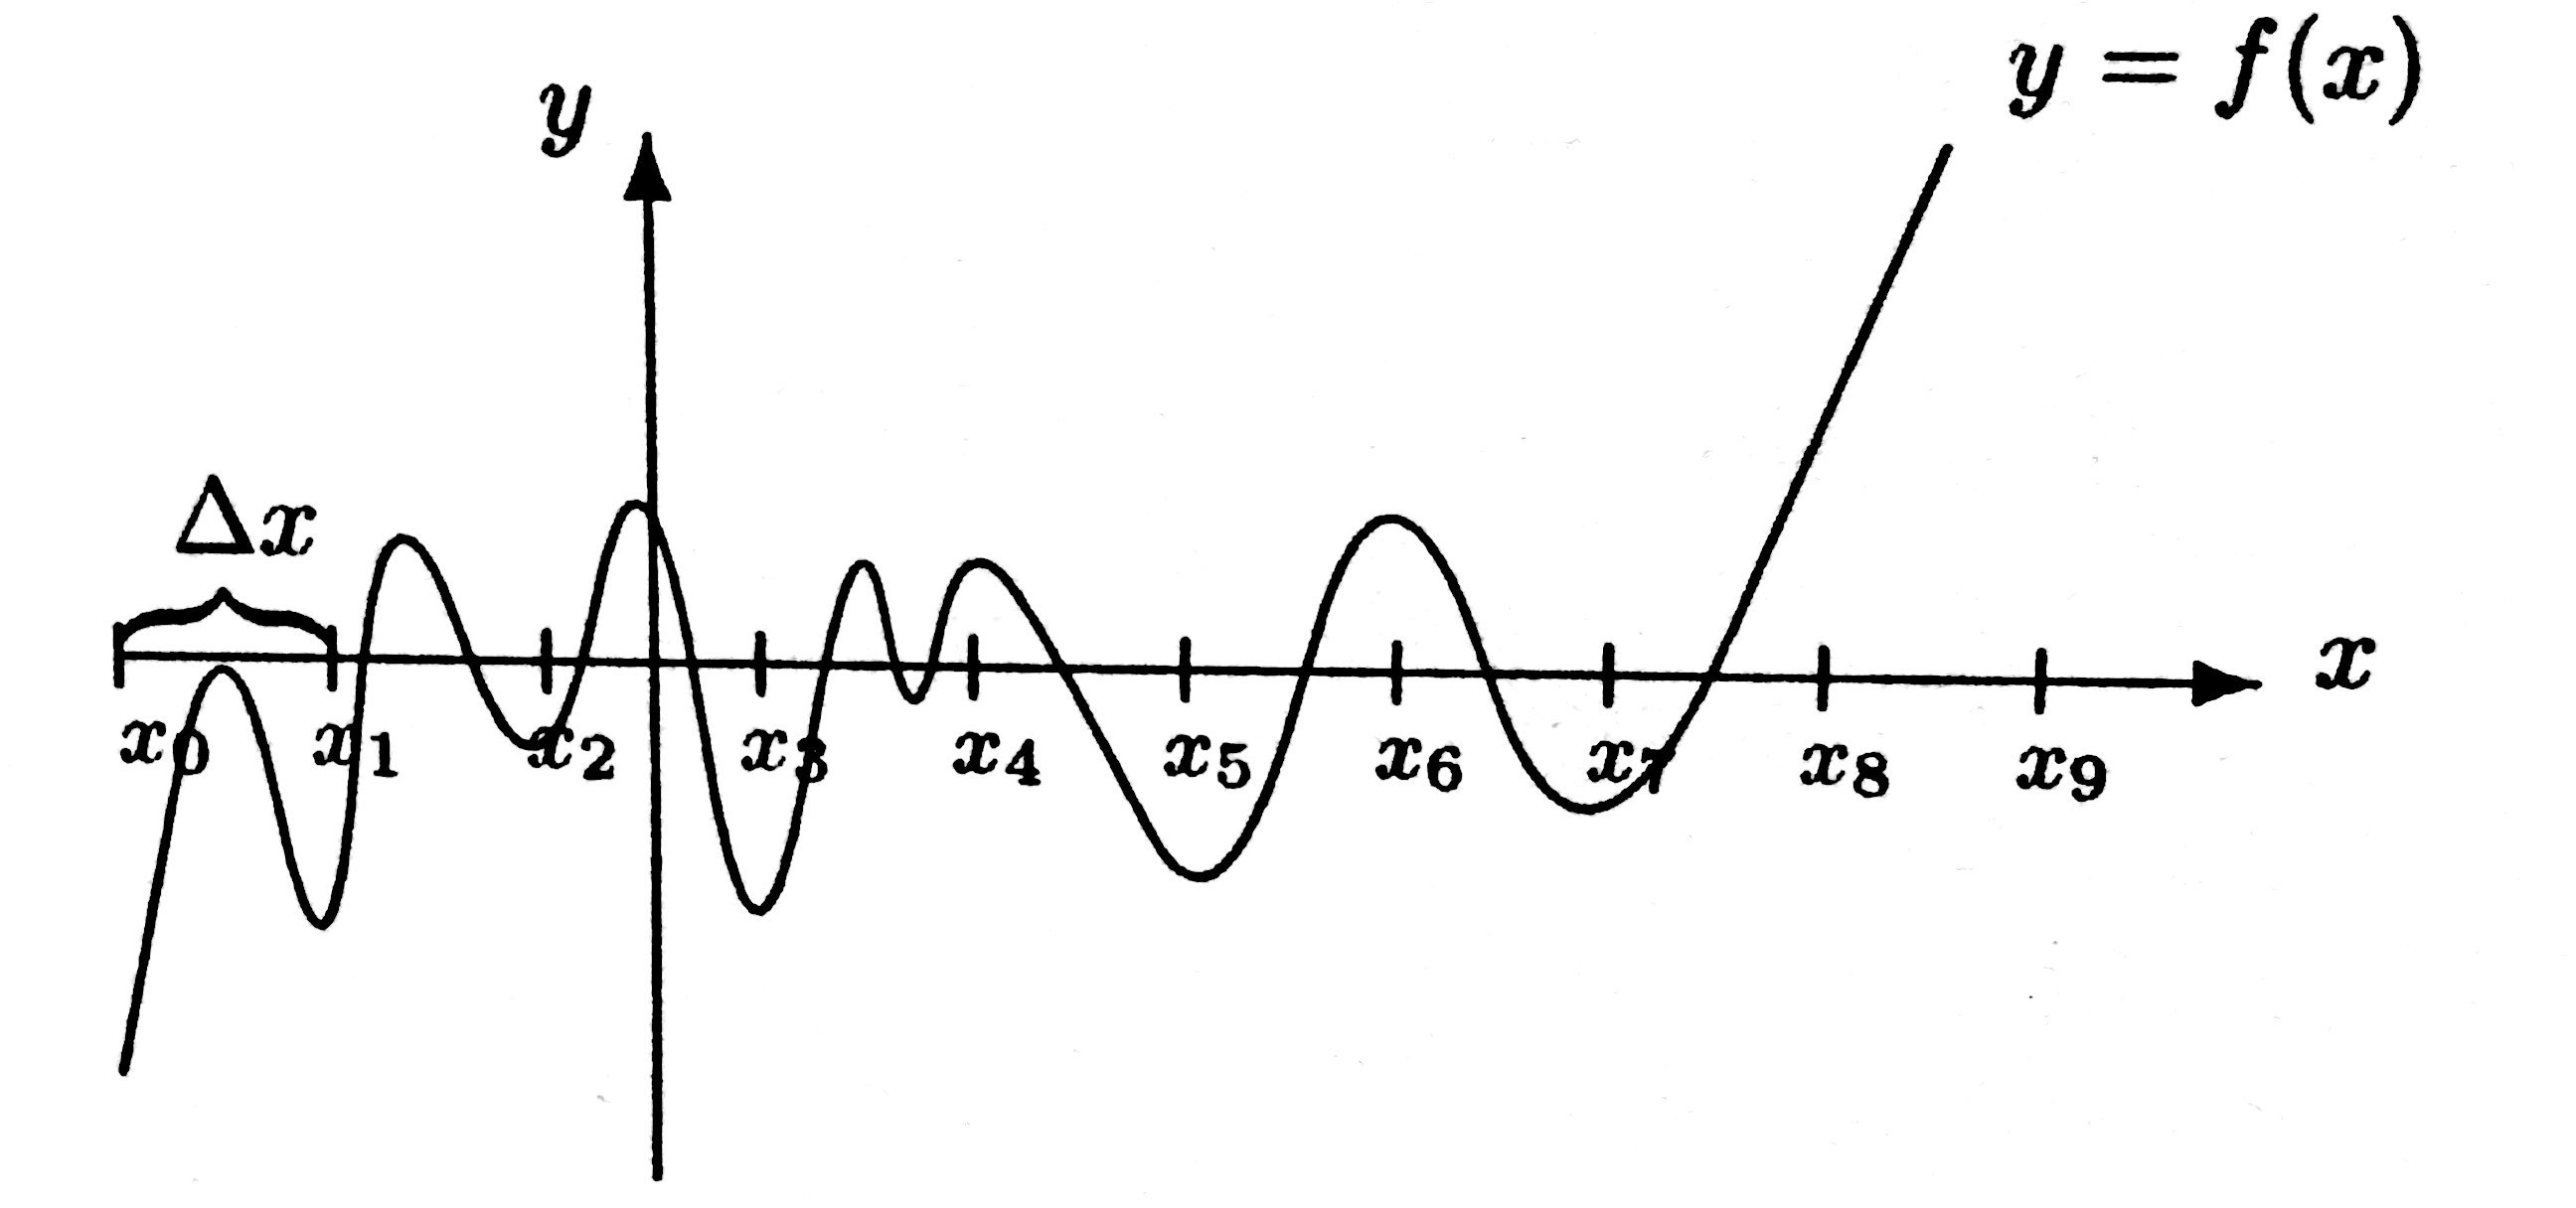

**Tomado de:** *Correa Zabala, Francisco*. Métodos Numéricos, Universidad EAFIT. 2013

Analizando la figura anterior se observa:

- La función $f$ asociada a la ecuación $f(x)=0$ es continua


- En $[x_0, x_1]$ se presenta una ambiguedad en el sentido de que visualmente no es posible determinar si la curva corta el eje $x$ una vez, dos veces o ninguna. Además el método no detectaría un intervalo válido, porque los signos de la evaluación en $x_0$ y $x_1$ son iguales.


- En los intervalos $[x_1, x_2]$ y $[x_2, x_3]$ hay dos raíces y el método no las percibe porque no hay cambio de signo en los extremos de los intervalos.


- En $[x_3, x_4]$ hay tres raíces. El método solo consigue determinar que existe al menos una, porque hay cambio de signo en los extremos, pero no establece cuántas.


- En cada uno de los intervalos $[x_4, x_5]$, $[x_5, x_6]$, $[x_6, x_7]$ y $[x_7, x_8]$ existe una sola raíz y el método consigue detectar su presencia.

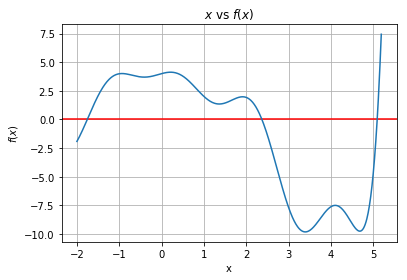

In [5]:
# Exact Solution Plot:

dt = 0.01

def f(x):
    return np.exp(3*x - 12.0) + x * np.cos(3*x) - x**2 + 4

x = np.arange(-2.0, 5.2, dt)

plt.xlabel (r"x")
plt.ylabel (r'$f(x)$')
plt.title (r'$x$ vs $f(x)$')

plt.axhline(0, color='red')           # se resalta el eje x para ayudar en la interpretación visual
plt.plot(x, f(x))
plt.grid(True)
plt.show()

## Métodos por intervalos o cerrados

Se caracterizan porque para su ejecución requieren un intervalo que contenga al menos una raíz y en su aplicación se reduce continuamente de tamaño el intervalo manteniendo la raíz en su interior. 

### Método de la Bisección

 Sea $f$ una función continua en un intervalo $[a,b]$, y $f(a) \times f(b) < 0$. Por el *Teorema del Valor Intermedio* para funciones continuas, existe al menos un $\alpha \in (a,b)$, tal que $f(\alpha) = 0$.
 
Este método consiste en dividir sucesivamente el intervalo $[a,b]$, por la mitad, hasta que la longitud del subintervalo que contiene a la raíz $\alpha$ sea menor que alguna tolerancia especificada $\epsilon$.



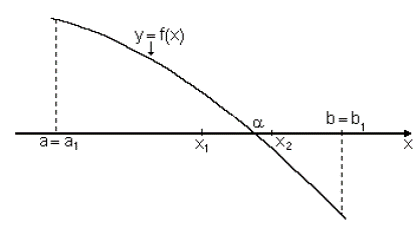

**Tomado de:** [Aprende en Línea - UdeA](http://aprendeenlinea.udea.edu.co/lms/moodle/pluginfile.php/6477/mod_page/content/1/Modulo_3/Imagenes/func01.gif)

**Algoritmo: Método de Bisección**

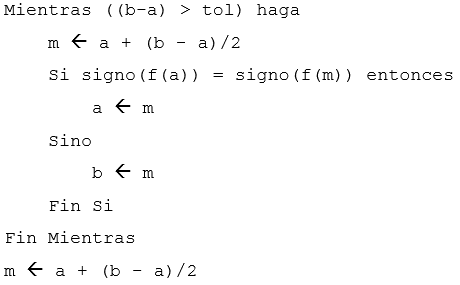

**Diagrama de flujo: Método de Bisección**

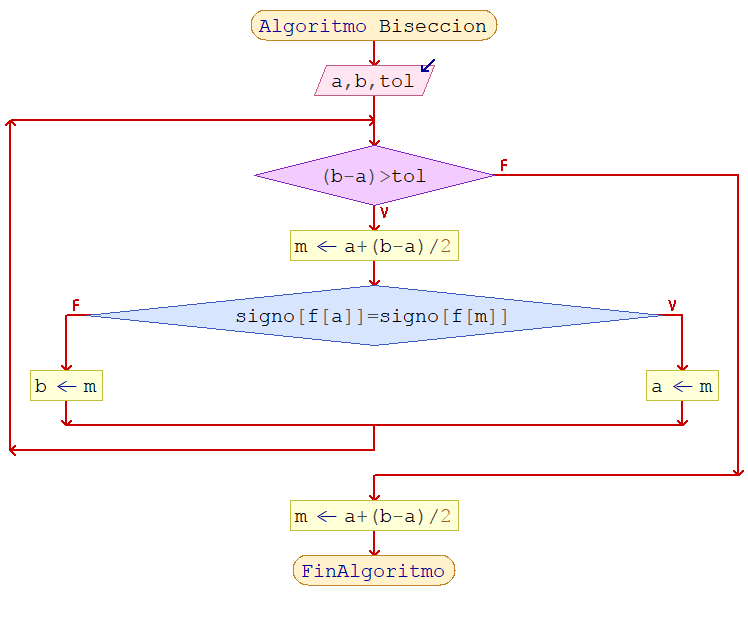

Realizado en el software [pseint](http://pseint.sourceforge.net "pseint")

**Ventajas:**

- Siempre converge.

- Útil como aproximación inicial de otros métodos.

**Desventajas:**

- No tiene en cuenta la magnitud de los valores de la función en las aproximaciones calculadas $x_n$, solo tiene en cuenta el signo de $f(x)$.

- Método linealmente convergente, $r = 1$, $C = 0.5$

**Criterios de paro y estimación del error:**

- Repetir el método para obtener una aproximación más exacta de la raíz.

- Finalizar el cálculo cuando el error se encuentre por debajo de algún nivel prefijado:

$$\epsilon_a = \frac{|x_r^{(i)}-x_r^{(i-1)}|}{x_r^{(i)}} \times 100 \% \leq Tol$$

- donde:

  - $i$: iteracion actual
  
  - $i-1$: iteración anterior


- Cada vez se encuentra una aproximación a la raíz cuando se usan bisecciones como:

$$x_r=\frac{|x_u - x_l|}{2}$$

- La raíz verdadera se halla en algún lugar dentro del intervalo:

$$\frac{|x_u - x_l|}{2}=\frac{\Delta x}{2}$$

- La raíz debe situarse en $\pm \Delta x / 2$, debido a que:

$$\frac{\Delta x}{2} = \frac{|x_r^{(i)}-x_r^{(i-1)}|}{2}$$

- La ecuación anterior proporciona un límite superior exacto sobre el error real.


- Aunque este método es el más lento, la claridad en el análisis del error lo hace muy atractivo para aplicaciones en ingeniería.

- Otra ventaja del método de Bisección es que el número de iteraciones requerido para obtener un cierto error absoluto se puede calcular $a – priori$, es decir.


- Al momento de empezar las iteraciones, el error absoluto es:

$$E_a^{(0)} = |x_u^{(0)} - x_l^{(0)}| = \Delta x^{(0)}$$

- Después de la primera iteración, el error es:

$$E_a^{(1)} = \frac{\Delta x^{(0)}}{2}$$

- El error absoluto correspondiente a la última iteració sería:

$$E_{a}^{(n)} = \frac{\Delta x^{(0)}}{2^n}$$

### Regula Falsi (Falsa Posición)

- Consideremos una función $f$ continua en un intervalo $[a,b]$, y tal que $f(a) \times f(b) < 0$. 


- Este método es similar al método de **Bisección** en el sentido de que se generan subintervalos $[a_n, b_n]$, que encierran a la raíz $\alpha$, pero esta vez $x_n$ no es el punto medio de $[a_n, b_n]$, sino el punto de intersección de la recta que pasa por los puntos $(a_n,f(a_n)), (b_n,f(b_n))$, con el eje $x$, al que le llamaremos $punto$ $intermedio$, $x_m$.

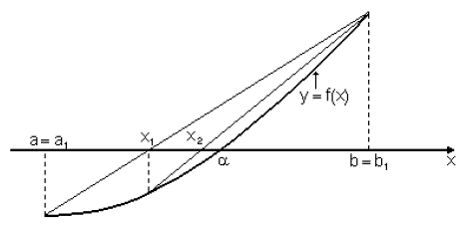

La determinación del punto intermedio se da de la siguiente manera: 

- Se halla la recta que une los puntos $(a, f(a)$) y $(b,f(b))$ mediante la expresión:

$$y - f(a) = \frac{f(b)-f(a)}{(b-a)}(x-a)$$

- Como los extremos estan en lados opuestos, se garantiza que la recta toca en algún punto el eje $x$. La coordenada de este punto es $y = (x_m, 0)$. Reemplazando este valor en la ecuación de la recta hallada, y despejando para $x_m$:

$$x_m = a - \frac{f(a)(b-a)}{f(b)-f(a)}$$

- Con este punto, se determina el valor de $f(m)$ y su signo, y al igual que con el método de Bisección, se compara con el signo de $f(a)$ y $f(b)$ para reemplazar uno de los dos extremos, $a$ o $b$ por un nuevo valor de $x_m$.


- Se repite el proceso hata alcanzar la tolerancia indicada.

**Diagrama de flujo: Método de Regula Falsi**

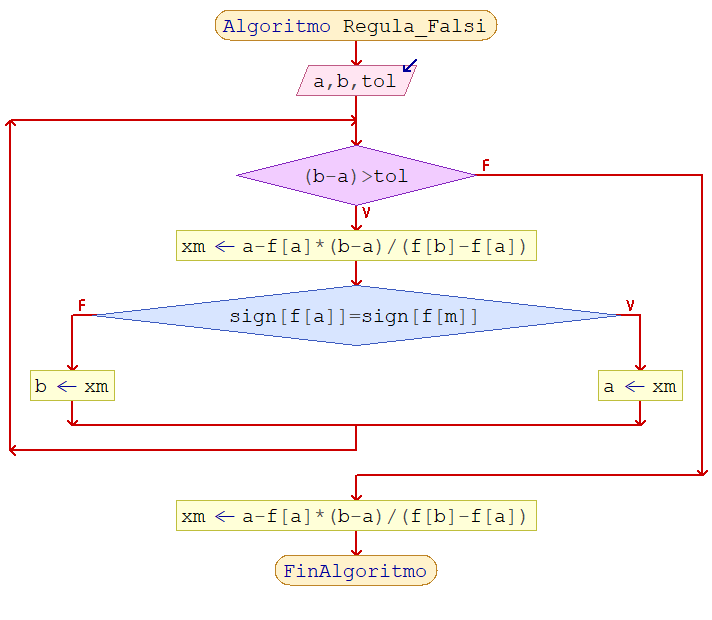

Realizado en el software [pseint](http://pseint.sourceforge.net "pseint")

## Métodos Abiertos

- A diferencia de los *métodos cerrados*, calculan en cada iteración una aproxmación a la raíz, sin necesidad de verificar lo que sucede dentro de un intervalo.


- Al igual que los *métodos cerrados*, los *métodos abiertos* generan una sucesión $\{x_n\}_{n=0}^{\infty}$ que se espera converjan a la raíz.


- Los *métodos abiertos* no necesariamente converjen en muchos casos, sin embargo, si lo logran hacer, son mucho más eficientes que los métodos cerrados.

### Método de Punto Fijo

Dada una ecuación $f(x)=0$, se puede transformar, en otra equivalente del tipo $x=g(x)$ para alguna función $g$. En este caso se tiene que: $\alpha$ es raíz de $f(x)=0$, entonces $f(\alpha)=0$, entonces $\alpha=g(\alpha)$, entonces $\alpha$ es raíz de $x=g(x)$.

**Definición:** Un número $\alpha$ tal que $\alpha = g(\alpha)$ se dice un punto fijo de la función $g$.

**Teorema de punto fijo:** Si $g$ es una función continua en $[a,b]$, y $g(x) \in [a,b] \vee x \in [a,b]$, entonces $g$ tiene por lo menos un punto fijo en $[a,b]$. Si además, $g’(x)$ existe $\vee x \in (a,b)$, y $|g’(x)|\leq K < 1 \vee x \in (a,b)$, $K$ constante, entonces $g$ tiene un único punto fijo $x \in [a,b]$, y se tiene la sucesión $\{x_n\}_{n=0}^\infty$ definida mediante la fórmula de iteración:

$$x_n = g(x_{n-1}), n = 1, 2, 3, \ldots$$



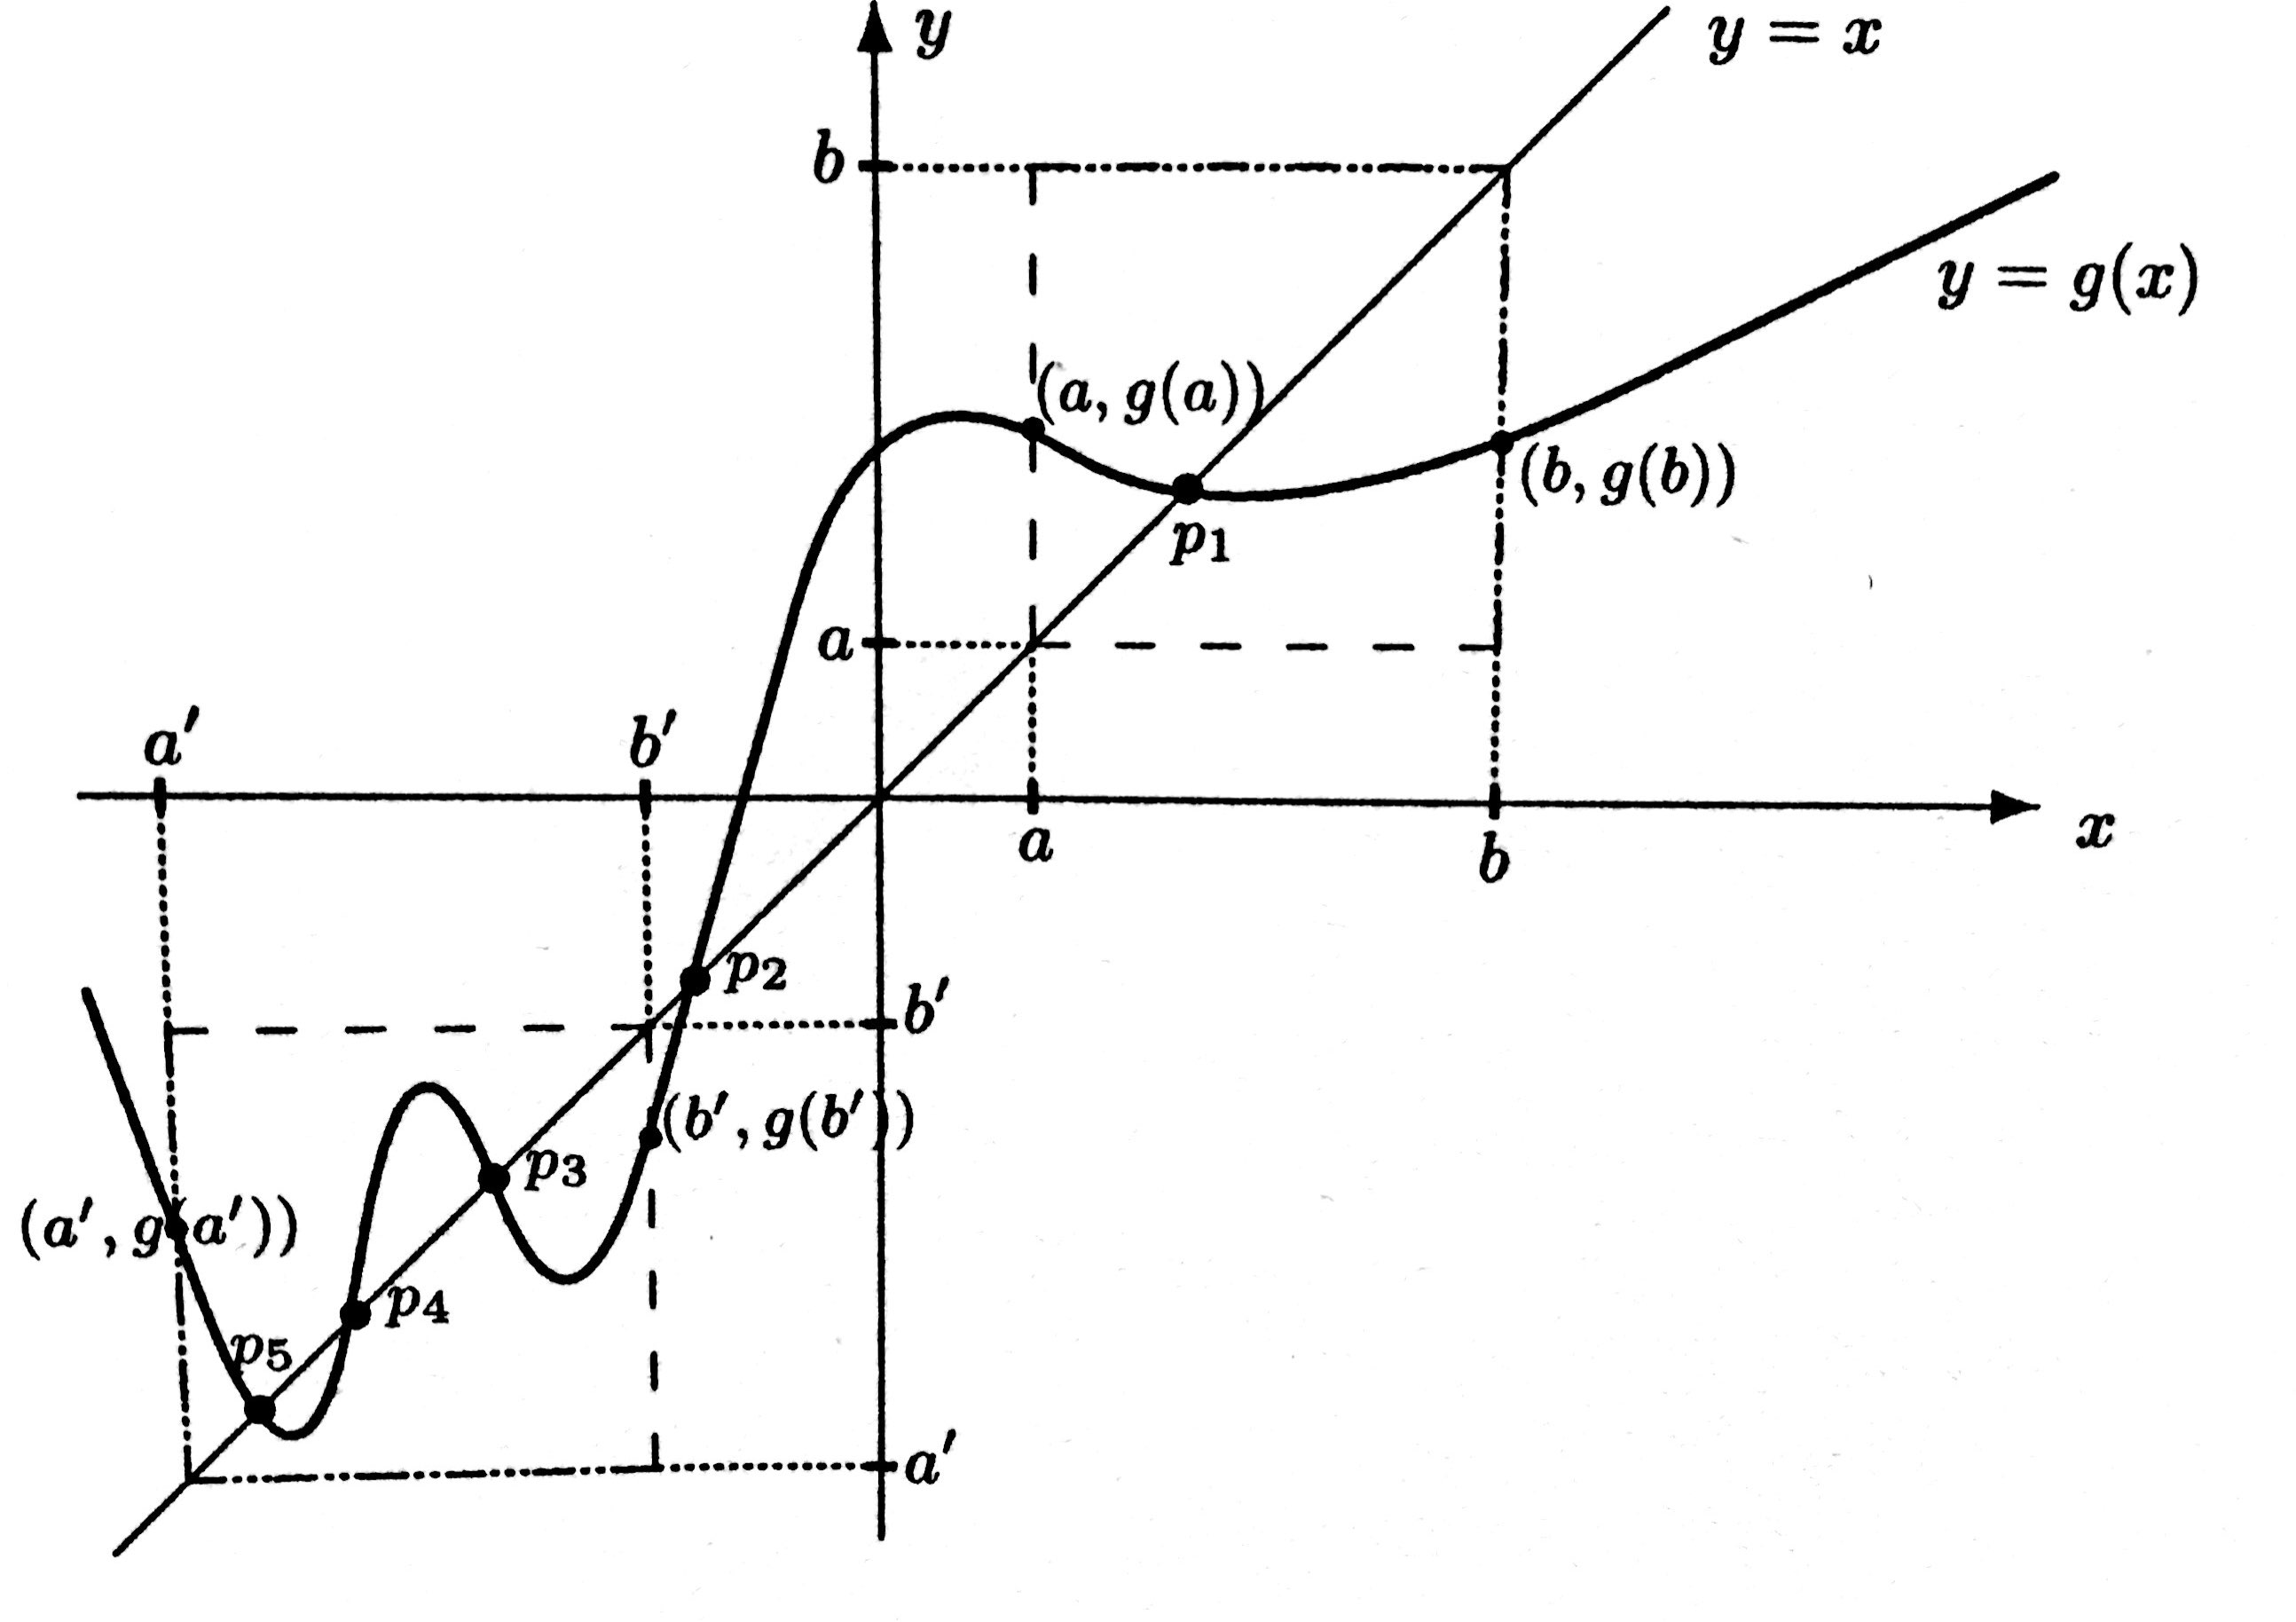

- El comportamiento de los esquemas de punto fijo puede variar ampliamente desde la divergencia, lenta convergencia, a la rápida convergencia.


- La vía más simple (aunque no más general) de caracterizar el comportamiento de la iteración de punto fijo es considerar la derivada de $g$ en una solución $\hat{x}$. 


- Si $\hat{x}=g(\hat{x})$ y $|g’(\hat{x})|<1$, entonces el esquema es localmente convergente. Es decir, existe un intervalo conteniendo $\hat{x}$ tal que el correspondiente esquema iterativo es convergente si comienza dentro del intervalo.


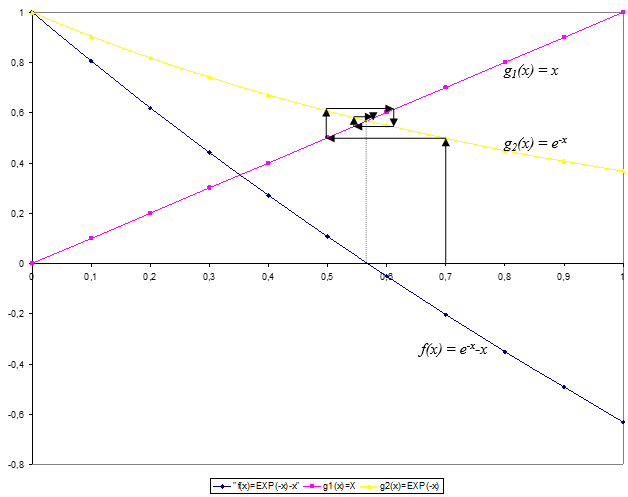

### Ejemplo: Algunos esquemas de Punto Fijo:

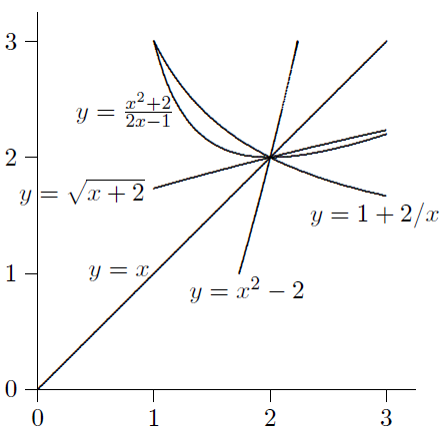

**Tomado de:** Michael T. Heath: Scientific Computing: An Introductory Survey

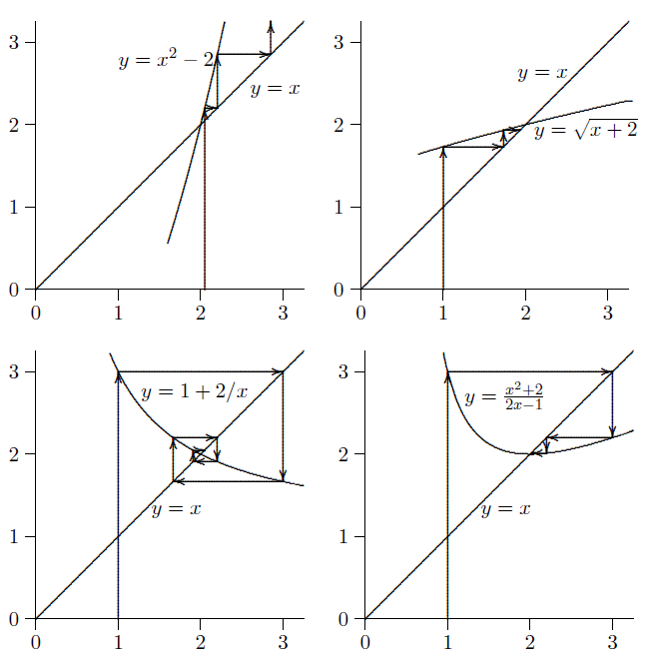
**Tomado de:** Michael T. Heath: Scientific Computing: An Introductory Survey

### Método de Newton Raphson

- Es uno de los métodos más usados en aplicaciones prácticas debido a su rapidéz y efectividad.


- Para un correcto análisis se presentarán tres acercamientos al método desde puntos de vista diferentes:

  - Geométrico
  
  - como Punto Fijo
  
  - Analítico

#### Aproximación Geométrica:

- Conocido también como el método de las tangentes.

- Como se presenta en la siguiente figura:



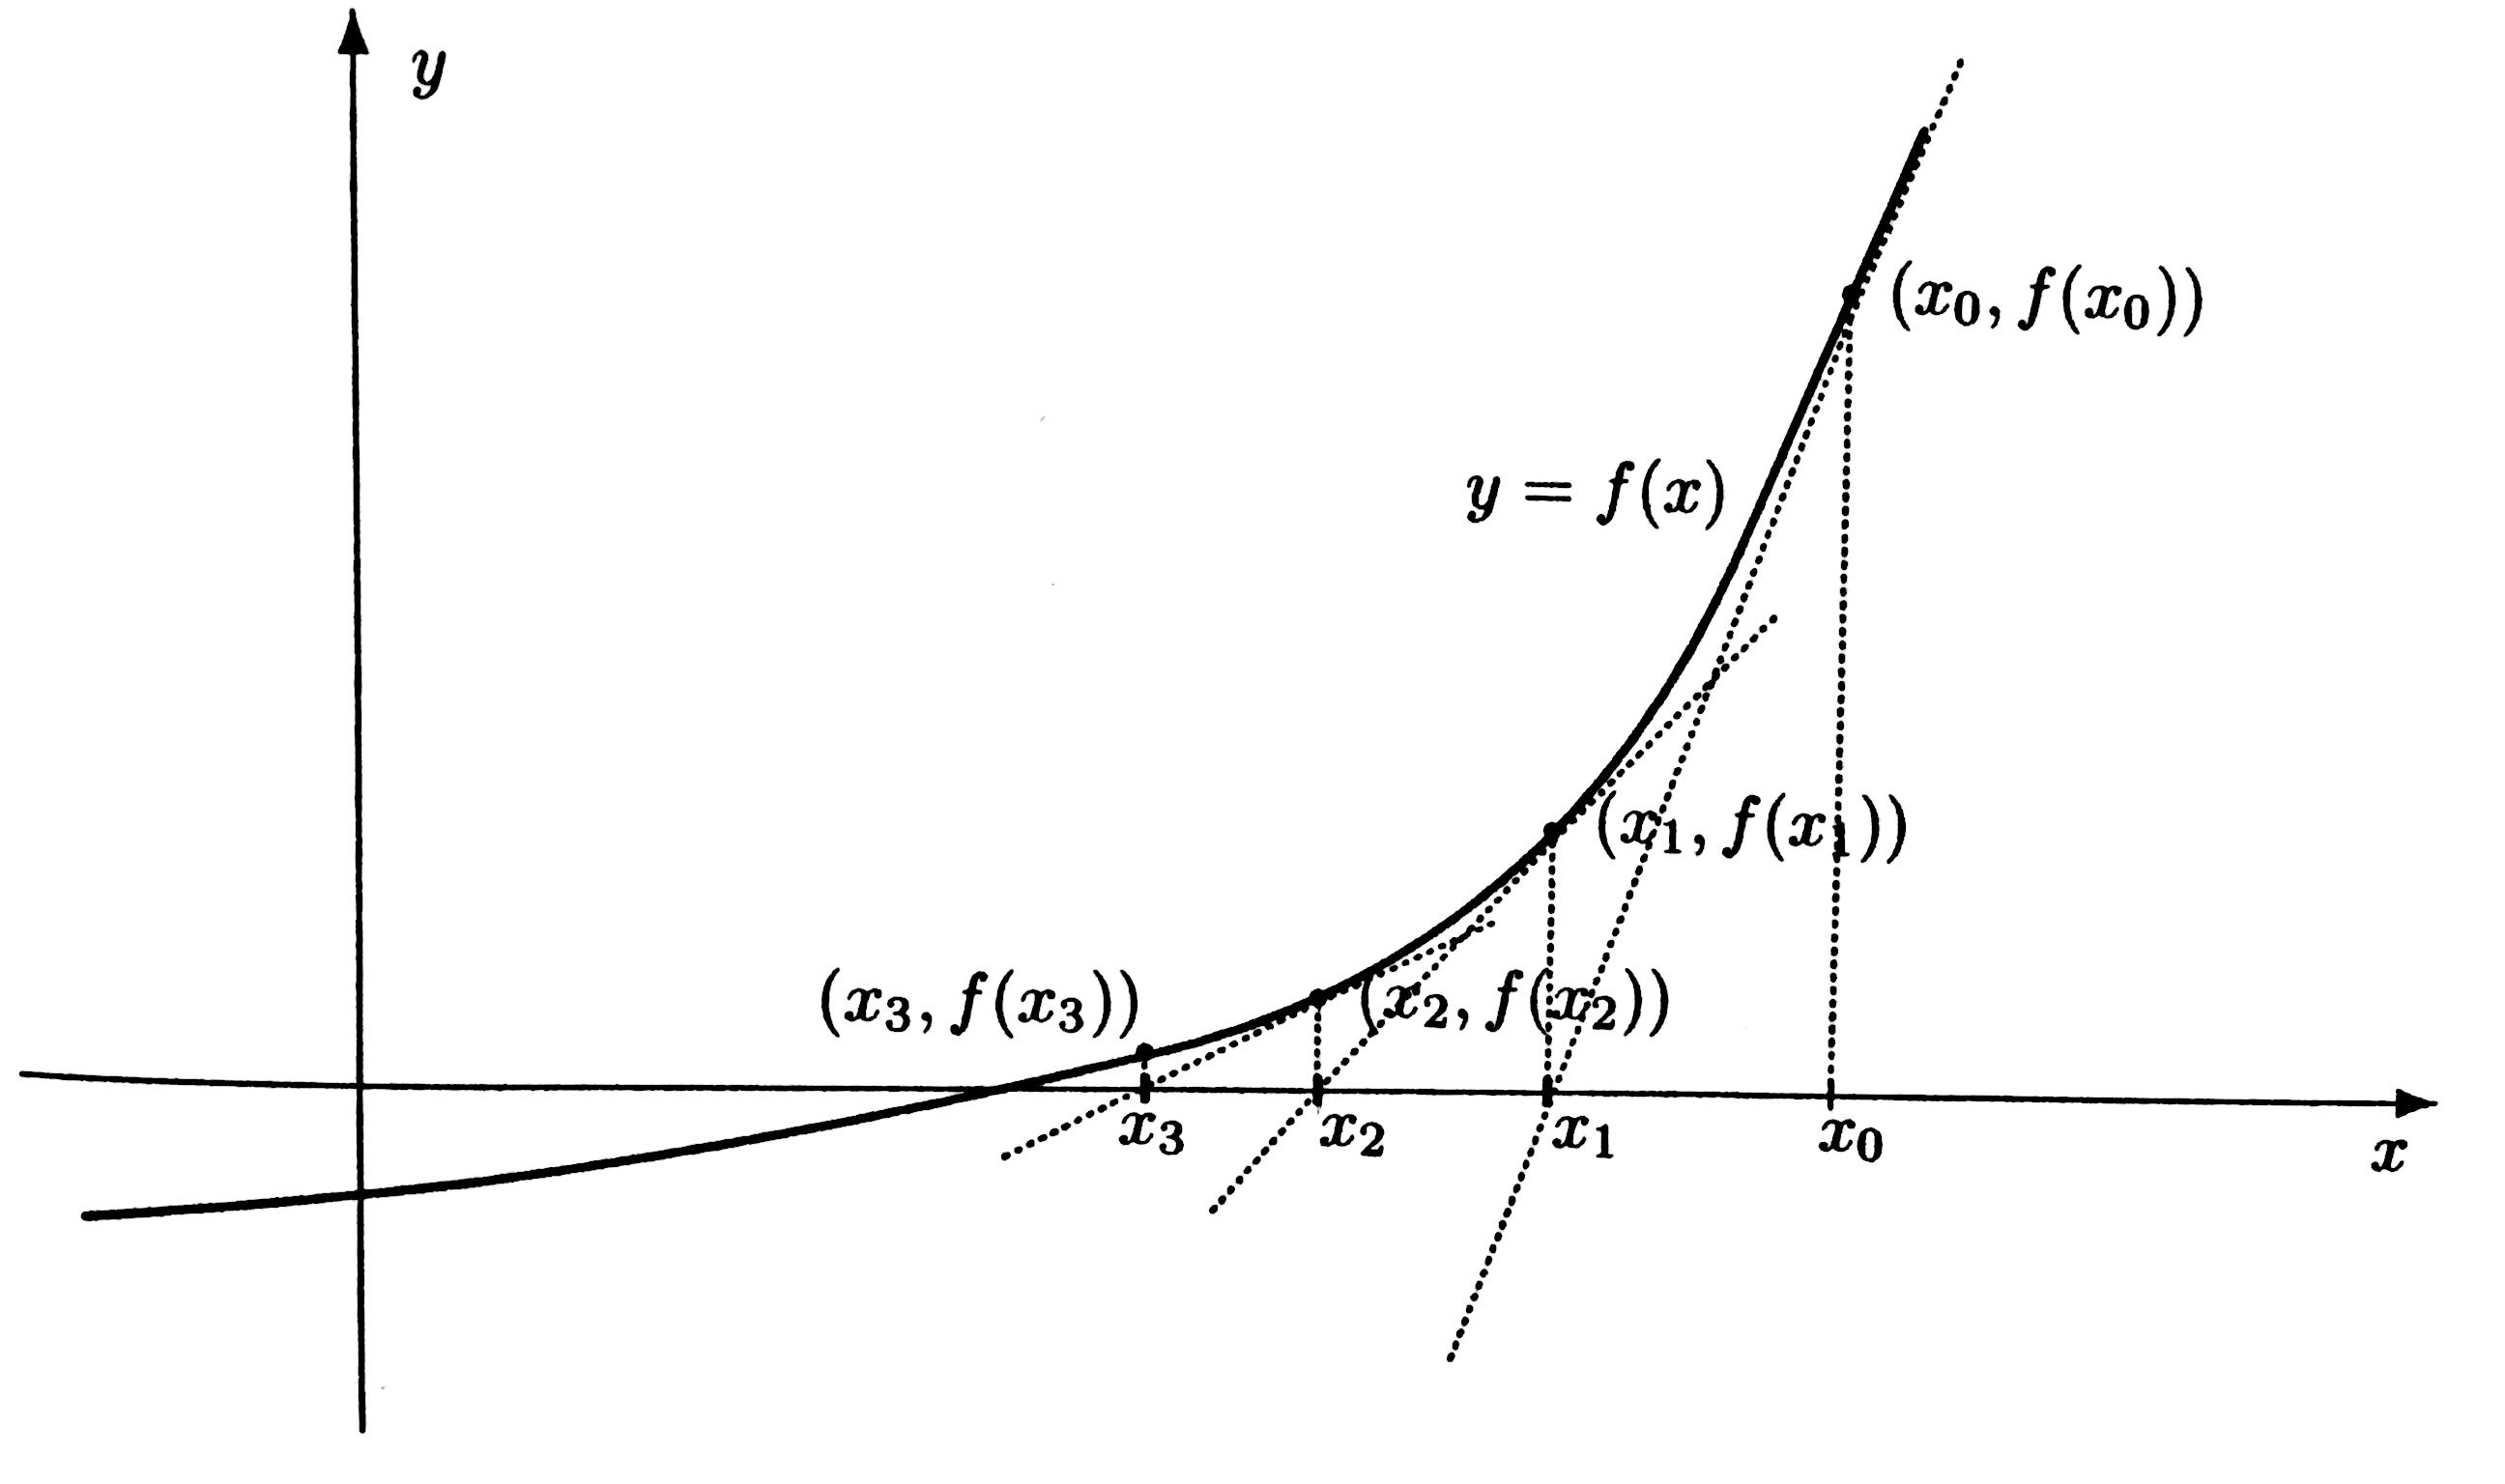

Los valores de $x_0, x_1, \ldots, x_n$ se obtienen como el punto de corte con el eje $x$ de las rectas tangentes a la curva $y = f(x)$ en los puntos $(x_0,f(x_0))$, $(x_1,f(x_1))$, $\ldots$,$(x_n,f(x_n))$.

La ecuación de la recta tangente tangente a la curva $y = f(x)$ en el punto $(x_0, f(x_0))$, está dada por la expresión:

$$y - f(x_0)=f'(x_0)(x-x_0)$$

Sustituyendo en esta ecuación la coordenada del punto intersección de la recta tangente $(x_1,0)$ y despejando para $x_1$:

$$x_1=x_0-\frac{f(x_0)}{f'(x_0)}$$

Continuando de forma recursiva para cada uno de los puntos $x_i$:

$$x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}$$


#### Aproximación como Punto Fijo

De la ecuación anterior, se puede observar que tiene la forma de punto fijo: $x = g(x)$.

#### Aproximación Analítica:

Aproximando la función $f$ por $series$ $de$ $Taylor$:

Sea $f \in C^2[a,b]$, $\hat{x} \in [a,b]$ y $x_v \in [a,b]$ tal que $f(x_v)=0$ y $\hat{x}$ es un valor muy cercano a $x_v$, entonces, el polinomio de $Taylor$ con dos términos para aproximar $f(x)$ alrededor de $\hat{x} \in [a,b]$ es:

$$f(x)=f(\hat{x})+f'(\hat{x})(x-\hat{x})+\frac{f''(\xi)}{2!}(x-\hat{x})^2$$

donde, $\xi$ es un valor que está entre $x$ y $\hat{x}$.

Si $\hat{x}$ es muy cercano a $x$, es decir, $|x - \hat{x}| \approx 0$ entonces $|x - \hat{x}|^2$ es aún más cercano a $0$ y si $|f''(\xi)|$ también es pequeño, la ecuación anterior se reduce a:

$$0 \approx f(\hat{x})+f'(\hat{x})(x-\hat{x})$$

despejando $x$ y generando la sucesión de iteración:

$$x_{n+1} = x_n-\frac{f(x_n)}{f'(x_n)}$$

### Análisis de Convergencia del Método de $Newton$ $Raphson$

Actividad para ser realizada por el estudiante.

### Método de la Secante

La mayor limitante que tiene el método de $Newton$ es la evaluación explícita de la derivada y cuando ella es cero, o muy cercana a cero, en la raíz.

Recordando que la derivada se define como:

$$f'(x_n) = \lim_{x \to x_n} \frac{f(x)-f(x_n)}{x-x_n}$$

Aproximando el valor límite evaluando en algún punto $x_{n-1}$,

$$f'(x_n) \approx \frac{f(x_{n-1})-f(x_n)}{x_{n-1}-x_n}$$

y sustituyendo la derivada en el denominador de la ecuación de iteración en el método de $Newton$:

$$x_{n+1}=x_n - \frac{f(x_n)(x_n-x_{n-1})}{f(x_n)-f(x_{n-1})}$$

#### Consideraciones al Método de la Secante:

- se requieren dos valores iniciales: $x_0$ y $x_1$. 

- A partir de estos dos valores se obtiene $x_2$ y así sucesivamente

- El método de la Secante es muy similar al método de la Regula Falsi

#### Presentación Geométrica del Método de la Secante:

Supongamos conocidos los valores $x_0$ y $x_1$, con estos valores se tienen sus respectivas coordenadas $(x_0 , f(x_0))$ y $(x_1 , f(x_1))$. Con estos puntos se puede determinar la ecuación de la línea recta:

$$y - f(x_1)=\frac{f(x_1)-f(x_0)}{x_1 - x_0}(x - x_1)$$

el valor $x_2$ es el punto de intersección de la recta secante generada con los puntos $x_0$ y $x_1$ y el eje $x$, y tiene por coordenadas $(x_2, 0)$. Reemplazando este punto en la ecuación anterior se obtiene:

$$x_2=x_1-\frac{f(x_1)-f(x_0)}{x_1 - x_0}(x - x_1)$$

siguiendo el mismo razonamiento, se obtiene la sucesión $\{x_n\}_{n=0} ^{\infty}$

### Método para calcular raíces múltiples y en Polinomios

Se deja como actividad para los estudiantes.

Método de Horner...